In [ ]:
# Para saber más sobre estos datos
# https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

# Sección 0: Cargar y organizar datos

In [ ]:
# Carga el dataset
data = pd.read_csv("covtype.csv")
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
type(data)

pandas.core.frame.DataFrame

Noten que debido al número de registros, algunos processos podrían requerir tiempo considerable.

In [ ]:
# Revisión rápida para saber si hay datos faltantes
# No los hay!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
# Elimina cover type
data.drop(columns=['Cover_Type'], inplace=True)
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Extract data as numeric matrix
X = data.to_numpy()

print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(581012, 54)


In [ ]:
# Solo uso 5,000 para hacerlo eficiente
rand_idx = np.random.permutation(len(X))

X = X[rand_idx[:5000]]
print(X.shape)

(5000, 54)


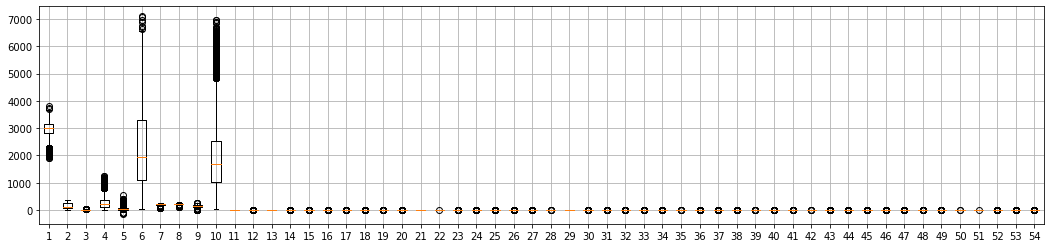

In [ ]:
# Muestra la distribución de las variables
plt.figure(figsize=(18, 4))
plt.boxplot(X)
plt.grid()
plt.show()

In [ ]:
# Crea y entrena un escalador (Robust scaler)
scaler = RobustScaler()
scaler.fit(X)

np.set_printoptions(precision=2, suppress=True) # para imprimir con 2 decimales
print(scaler.center_)
print(scaler.scale_)

[2990.  126.   13.  228.   30. 1959.  218.  226.  143. 1684.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.]
[ 352.25  204.      9.    276.     64.   2191.     34.     24.     49.
 1522.25    1.      1.      1.      1.      1.      1.      1.      1.
    1.      1.      1.      1.      1.      1.      1.      1.      1.
    1.      1.      1.      1.      1.      1.      1.      1.      1.
    1.      1.      1.      1.      1.      1.      1.      1.      1.
    1.      1.      1.      1.      1.      1.      1.      1.      1.  ]


In [ ]:
# Escala los datos
X = scaler.transform(X)

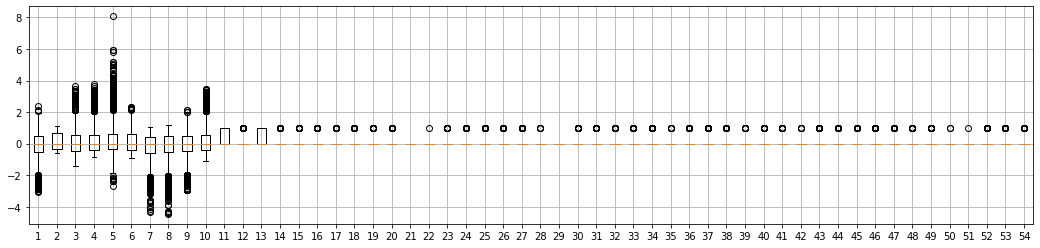

In [ ]:
# Muestra la distribución de las variables ya rescaldas
plt.figure(figsize=(18, 4))
plt.boxplot(X)
plt.grid()
plt.show()

# Sección 1: clustering

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Trata con differentes valores para k
inertia = []
silh = []
k_s = np.arange(2, 31)
for k in k_s:
  km_model = KMeans(n_clusters=k).fit(X)
  inertia.append(km_model.inertia_)
  silh.append(silhouette_score(X, km_model.labels_))

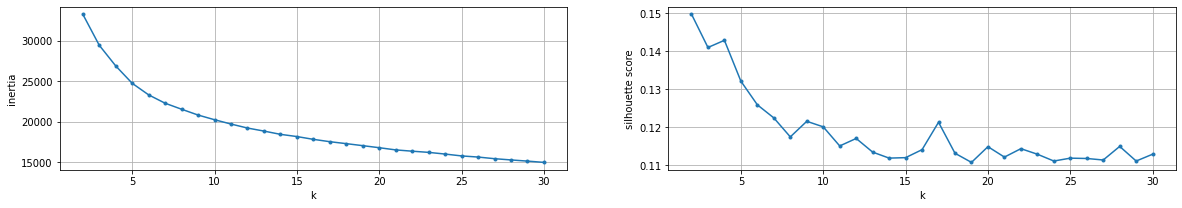

In [ ]:
# Plot results
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(k_s, inertia, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('inertia')
plt.subplot(1, 2, 2)
plt.plot(k_s, silh, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

In [ ]:
# Repite k-means con el mejor número k
km_model = KMeans(n_clusters=2).fit(X)
print(f"k-mean clustering labels: {np.unique(km_model.labels_)}")

k-mean clustering labels: [0 1]


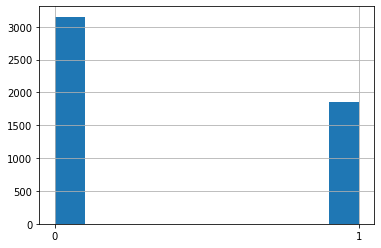

In [ ]:
plt.hist(km_model.labels_)
plt.xticks(ticks=np.unique(km_model.labels_), labels=np.unique(km_model.labels_))
plt.grid()
plt.show()

# Sección 2: Visualiza clustering con t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Reduce dimensinalidad con t-SNE
Z = TSNE(n_components=2).fit_transform(X)
print(Z.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(5000, 2)


Text(0, 0.5, 'Z2')

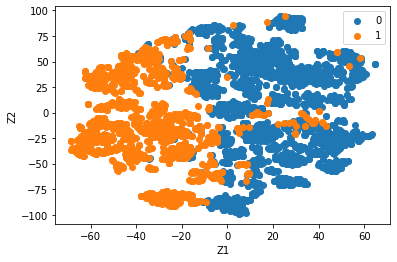

In [ ]:
# Plot clusters (kmeans + tSNE)
for cl in np.unique(km_model.labels_):
  plt.scatter(Z[km_model.labels_==cl, 0], Z[km_model.labels_==cl, 1], label=cl)
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()

# Sección 3: reduce dimensionalidad con PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Crea y entrena un modelo PCA
pcs = PCA(n_components=X.shape[1])
pcs.fit(X)

PCA(n_components=54)

In [ ]:
# Reporte de PCA
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative variance': np.cumsum(pcs.explained_variance_ratio_)})

pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC'+str(ind) for ind in range(1, X.shape[1]+1)]
pcsSummary.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
Standard deviation,1.25,1.20,1.10,0.89,0.73,0.64,0.54,0.50,0.46,0.38,...,0.03,0.03,0.03,0.02,0.01,0.01,0.0,0.0,0.0,0.0
Proportion of variance,0.20,0.19,0.16,0.10,0.07,0.05,0.04,0.03,0.03,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Cumulative variance,0.20,0.39,0.55,0.65,0.72,0.77,0.81,0.84,0.87,0.89,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0


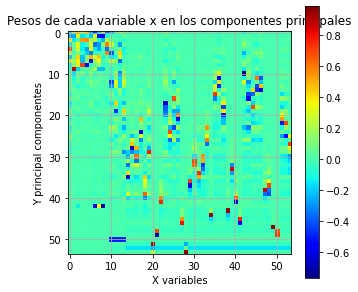

In [ ]:
# Grafica la matrix de proyección
plt.figure(figsize=(5, 5))
plt.title('Pesos de cada variable x en los componentes principales')
plt.imshow(pcs.components_, cmap='jet')
plt.xlabel('X variables')
plt.ylabel('Y principal componentes')
plt.grid()
plt.colorbar()
plt.show()

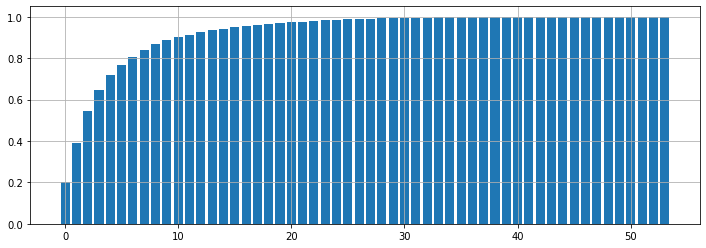

In [ ]:
# Observa la varianza acumulada
var_cumsum = np.cumsum(pcs.explained_variance_ratio_)
plt.figure(figsize=(12, 4))
plt.bar(range(X.shape[1]), var_cumsum)
plt.grid()
plt.show()

In [ ]:
# Encuentra el PC donde acumulamos 95% de la información
idx = np.where(var_cumsum >= 0.95)[0][0]
print(f"{idx}: {var_cumsum[idx]:.4f}")

16: 0.9541


In [ ]:
# Calcula solo los primeros PC
pca_model = PCA(n_components=idx).fit(X)
print(pca_model.components_.shape)

(16, 54)


In [ ]:
# Proyecta los datos al espacio reducido
PCs = pca_model.transform(X)
print(PCs.shape)

(5000, 16)


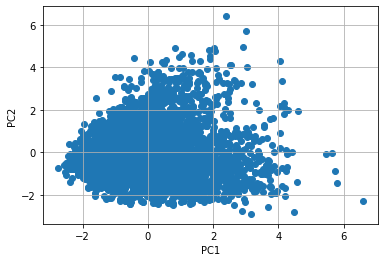

In [ ]:
# Grafica los dos primeros PCs
plt.scatter(PCs[:, 0], PCs[:, 1])
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Sección 4: Nuevamente realicemos clustering, ahora con los datos reducidos

In [ ]:
# Trata con differentes valores para k
inertia = []
silh = []
k_s = np.arange(2, 31)
for k in k_s:
  km_model = KMeans(n_clusters=k).fit(PCs)
  inertia.append(km_model.inertia_)
  silh.append(silhouette_score(PCs, km_model.labels_))

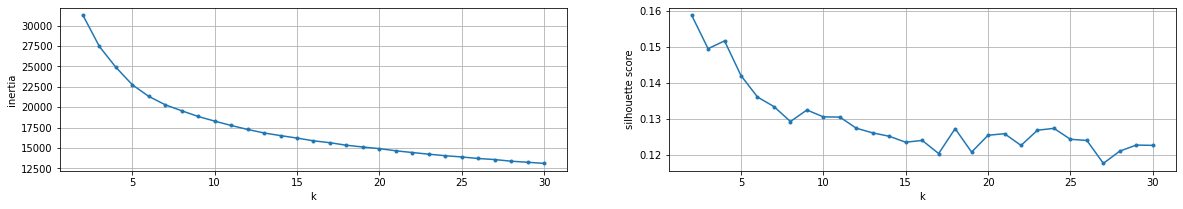

In [ ]:
# Plot results
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(k_s, inertia, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('inertia')
plt.subplot(1, 2, 2)
plt.plot(k_s, silh, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

In [ ]:
# Repite k-means con el mejor número k
km_model = KMeans(n_clusters=2).fit(PCs)
print(f"k-mean clustering labels: {np.unique(km_model.labels_)}")

k-mean clustering labels: [0 1]


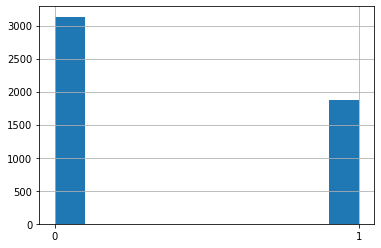

In [ ]:
plt.hist(km_model.labels_)
plt.xticks(ticks=np.unique(km_model.labels_), labels=np.unique(km_model.labels_))
plt.grid()
plt.show()

# Sección 5: Nuevamente visualizar con t-SNE, ahora con datos reducidos

In [ ]:
# Reduce dimensinalidad con t-SNE
Z = TSNE(n_components=2).fit_transform(PCs)
print(Z.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(5000, 2)


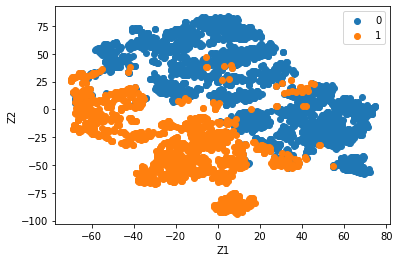

In [ ]:
# Plot clusters (PCA + kmeans + tSNE)
for cl in np.unique(km_model.labels_):
  plt.scatter(Z[km_model.labels_==cl, 0], Z[km_model.labels_==cl, 1], label=cl)
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()